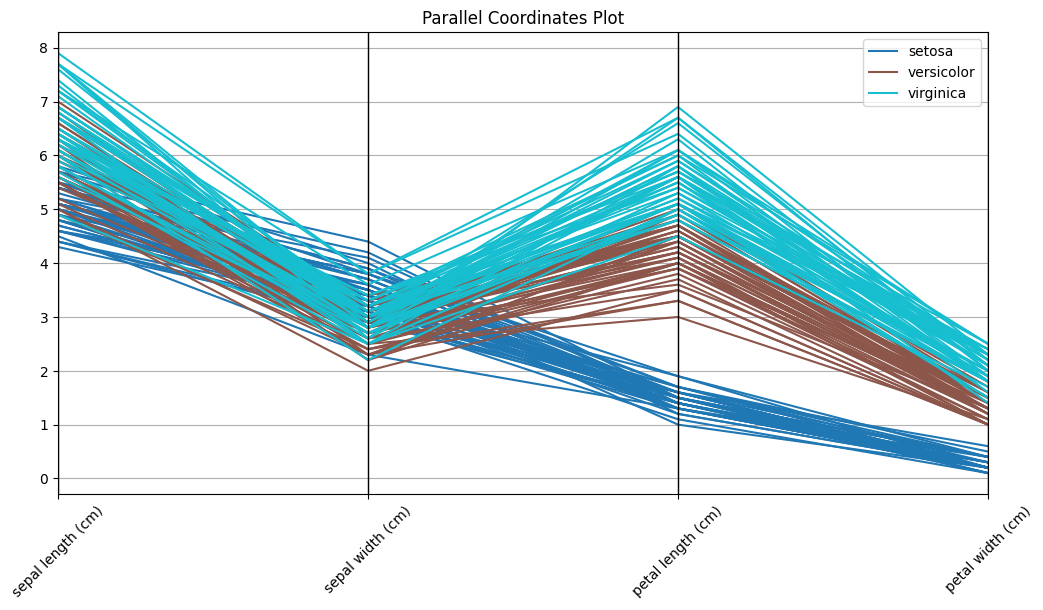

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml, load_iris
from pandas.plotting import parallel_coordinates


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Category'] = iris.target_names[iris.target]

# 1. Parallel Coordinates Plot
def plot_parallel_coordinates(df):
    plt.figure(figsize=(12, 6))
    parallel_coordinates(df, class_column='Category', colormap=plt.get_cmap("tab10"))
    plt.title("Parallel Coordinates Plot")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_parallel_coordinates(df)

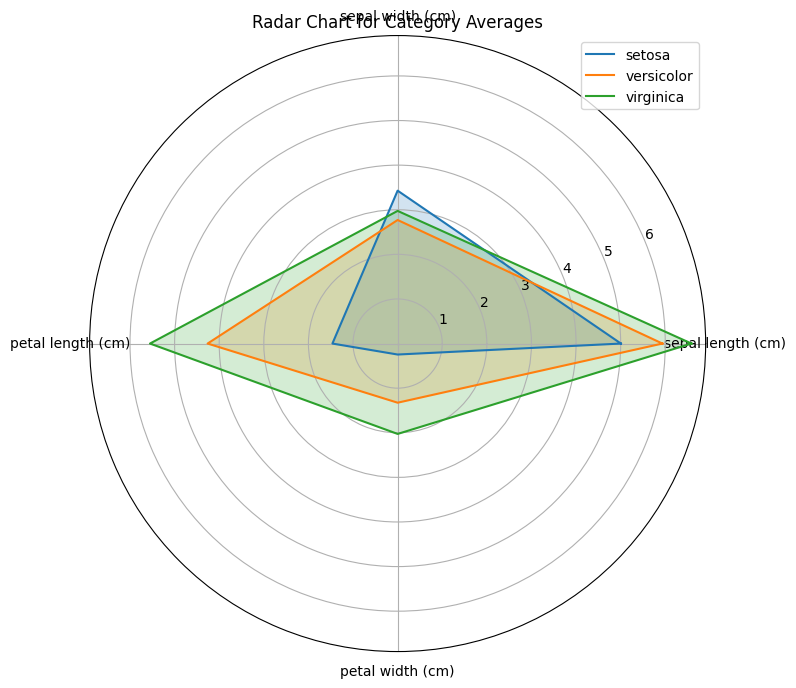

In [2]:
# 2. Polygon Plot (Gaming-style Stat Chart)
def plot_radar_chart(df):
    categories = df.columns[:-1]  # Exclude 'Category'
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the radar chart

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"polar": True})

    for category in df['Category'].unique():
        subset = df[df['Category'] == category].iloc[:, :-1].mean().values.flatten()
        values = np.concatenate((subset, [subset[0]]))  # Close the shape

        ax.plot(angles, values, label=category)
        ax.fill(angles, values, alpha=0.2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title("Radar Chart for Category Averages")
    plt.legend()
    plt.show()

plot_radar_chart(df)

In [3]:
def plot_tsne_mnist():
    mnist = fetch_openml('mnist_784', version=1)
    X, y = mnist.data / 255.0, mnist.target.astype(int)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_embedded = tsne.fit_transform(X[:2000])

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y[:2000], cmap='jet', alpha=0.5)
    plt.colorbar(scatter, label="Digit Label")
    plt.title("T-SNE Visualization of MNIST (Hinton's Approach)")
    plt.show()

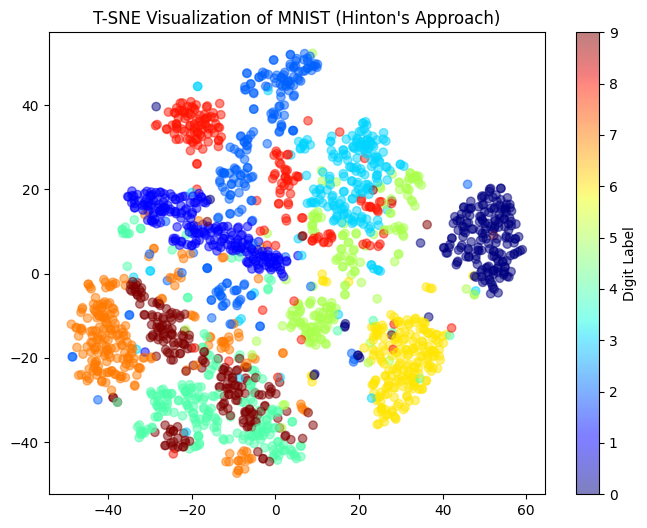

In [4]:
plot_tsne_mnist()